In [170]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
path="/Users/nikitalakhotia/Desktop/msba docs/data programming/project/Speed Dating Data_statecodes.csv"
data=pd.read_csv(path)

In [171]:
## Difference between rating given by subject to partner and rating given by subject to oneself ##
data["diff_attr"]=data["attr"]-data["attr3_1"] ## rating to partner-rating to oneself
data["diff_sinc"]=data["sinc"]-data["sinc3_1"]
data["diff_intel"]=data["intel"]-data["intel3_1"]
data["diff_fun"]=data["fun"]-data["fun3_1"]
data["diff_amb"]=data["amb"]-data["amb3_1"]

### if "diff_attribute" >0 than 1 else 0 i.e. partner's rating is higher than 1 else 0.

def bin(col):
    data.loc[data[col] > 0, col] = 1
    data.loc[data[col] < 0, col] = 0
    data.loc[data[col] == 0, col] = 0
bin("diff_attr")
bin("diff_sinc")
bin("diff_intel")
bin("diff_fun")
bin("diff_amb")

In [5]:
## Filtering for male and female ##
data_f=data[data["gender"]==0]
data_m=data[data["gender"]==1]

Logistics Regression taking into attributes (where subject rated the partner)

1)The independent variables are the ratings that the subject assigned to the partner for various attributes such as Attractiveness, Ambition, Intelligence, etc.

In [8]:

## Logistic regression on females
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices('dec ~ attr+sinc+intel+fun+amb+shar', data=data_f, return_type='dataframe')   
model = sm.Logit(y, X)      # Fit model (find the intercept and slopes)
result = model.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.502733
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    dec   No. Observations:                 3457
Model:                          Logit   Df Residuals:                     3450
Method:                           MLE   Df Model:                            6
Date:                Sat, 06 Aug 2016   Pseudo R-squ.:                  0.2386
Time:                        22:33:02   Log-Likelihood:                -1737.9
converged:                       True   LL-Null:                       -2282.7
                                        LLR p-value:                3.881e-232
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.5508      0.274    -20.294      0.000        -6.087    -5.015
attr           0.4062      0.

In [10]:
## Logistic regression on males
y, X = dmatrices('dec ~ attr+sinc+intel+fun+amb+shar', data=data_m, return_type='dataframe')   
model = sm.Logit(y, X)      # Fit model (find the intercept and slopes)
result = model.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.502307
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    dec   No. Observations:                 3583
Model:                          Logit   Df Residuals:                     3576
Method:                           MLE   Df Model:                            6
Date:                Sat, 06 Aug 2016   Pseudo R-squ.:                  0.2750
Time:                        22:39:14   Log-Likelihood:                -1799.8
converged:                       True   LL-Null:                       -2482.5
                                        LLR p-value:                7.342e-292
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.2991      0.267    -19.853      0.000        -5.822    -4.776
attr           0.6814      0.

Key Insights:

1) Males put more weight on physical attractivesness than female do.

2) While females put more weight on intelligence as compared to males.

### taking interaction terms of attr and diff_attr ####

In [21]:
y, X = dmatrices('dec ~ attr*diff_attr+sinc*diff_sinc+intel*diff_intel+fun*diff_fun+\
                 amb*diff_amb', data=data_f, return_type='dataframe')   
model = sm.Logit(y, X)      # Fit model (find the intercept and slopes)
result = model.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.512620
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    dec   No. Observations:                 3702
Model:                          Logit   Df Residuals:                     3686
Method:                           MLE   Df Model:                           15
Date:                Sat, 06 Aug 2016   Pseudo R-squ.:                  0.2230
Time:                        23:10:10   Log-Likelihood:                -1897.7
converged:                       True   LL-Null:                       -2442.2
                                        LLR p-value:                1.086e-222
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -3.4223      0.457     -7.486      0.000        -4.318    -2.526
attr       

In [20]:
y, X = dmatrices('dec ~ attr*diff_attr+sinc*diff_sinc+intel*diff_intel+fun*diff_fun+\
                 amb*diff_amb', data=data_m, return_type='dataframe')   
model = sm.Logit(y, X)      # Fit model (find the intercept and slopes)
result = model.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.502776
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    dec   No. Observations:                 3763
Model:                          Logit   Df Residuals:                     3747
Method:                           MLE   Df Model:                           15
Date:                Sat, 06 Aug 2016   Pseudo R-squ.:                  0.2738
Time:                        23:09:46   Log-Likelihood:                -1891.9
converged:                       True   LL-Null:                       -2605.4
                                        LLR p-value:                2.579e-295
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -4.8600      0.428    -11.353      0.000        -5.699    -4.021
attr       

1) For ambition, the interaction term is insignificant for females but is significantly negative for males.  In other words, men strictly prefer women with their own level of ambition to women more ambitious than they are. 

2) The results on intelligence are qualitatively similar to those on ambition

Hence, we demonstrate that on average men do not value women’s intel- ligence or ambition when it exceeds their own; moreover, a man is less likely to select a woman whom he perceives to be more ambi- tious than he is.


In [158]:
### Look at the importance of similarity ###
data_s1=data[["iid","pid","field_cd","country"]]
data_s2=data[["iid","pid","field_cd","country"]]
data_s=pd.merge(data_s1, data_s2, how="inner",left_on=["iid","pid"], right_on=["pid","iid"], suffixes=["_dater","_partner"])

In [159]:
## variable -> if subject has same race as partner 
data_s["field_same"]=0
data_s.loc[data_s["field_cd_dater"]== data_s["field_cd_partner"], "field_same"] = 1

data_s["region_same"]=0
data_s.loc[data_s["country_dater"]== data_s["country_partner"], "region_same"] = 1

In [160]:
data_s_drop=data_s.drop(data_s.columns[[2,3,4,5,6,7]], axis=1)
data_final=pd.merge(data, data_s_drop, how="left", left_on=["iid","pid"], right_on=["iid_dater", "pid_dater"])

In [161]:
## Filtering for male and female ##
data_f=data_final[data_final["gender"]==0]
data_m=data_final[data_final["gender"]==1]

In [74]:
y, X = dmatrices('dec ~ samerace+field_same+region_same', data=data_f, return_type='dataframe')   
model = sm.Logit(y, X)      # Fit model (find the intercept and slopes)
result = model.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.654935
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                    dec   No. Observations:                 4184
Model:                          Logit   Df Residuals:                     4180
Method:                           MLE   Df Model:                            3
Date:                Sun, 07 Aug 2016   Pseudo R-squ.:                0.002360
Time:                        01:50:43   Log-Likelihood:                -2740.2
converged:                       True   LL-Null:                       -2746.7
                                        LLR p-value:                  0.004712
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.6680      0.052    -12.750      0.000        -0.771    -0.565
samerace        0.1963    

In [75]:
y, X = dmatrices('dec ~ samerace+field_same+region_same', data=data_m, return_type='dataframe')   
model = sm.Logit(y, X)      # Fit model (find the intercept and slopes)
result = model.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.688579
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                    dec   No. Observations:                 4184
Model:                          Logit   Df Residuals:                     4180
Method:                           MLE   Df Model:                            3
Date:                Sun, 07 Aug 2016   Pseudo R-squ.:                0.004746
Time:                        01:50:51   Log-Likelihood:                -2881.0
converged:                       True   LL-Null:                       -2894.8
                                        LLR p-value:                 4.670e-06
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.2352      0.050     -4.683      0.000        -0.334    -0.137
samerace       -0.0161    

1) women exhibit strong preference for partners of their own race, while men do not.
Women strongly discriminate on the basis of race. Men, on the other hand, do not exhibit a significant racial preference.

2)both men and women prefer partners from the same region of the world.

In [87]:
y, X = dmatrices('dec ~ attr*diff_attr+sinc*diff_sinc+intel*diff_intel+fun*diff_fun+\
                 amb*diff_amb+samerace+field_same+region_same', data=data_f, return_type='dataframe')   
model = sm.Logit(y, X)      # Fit model (find the intercept and slopes)
result = model.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.512149
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    dec   No. Observations:                 3702
Model:                          Logit   Df Residuals:                     3683
Method:                           MLE   Df Model:                           18
Date:                Sun, 07 Aug 2016   Pseudo R-squ.:                  0.2237
Time:                        01:58:32   Log-Likelihood:                -1896.0
converged:                       True   LL-Null:                       -2442.2
                                        LLR p-value:                1.151e-220
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -5.7442      0.333    -17.239      0.000        -6.397    -5.091
attr       

In [88]:
y, X = dmatrices('dec ~ attr*diff_attr+sinc*diff_sinc+intel*diff_intel+fun*diff_fun+\
                 amb*diff_amb+samerace+field_same+region_same', data=data_m, return_type='dataframe')   
model = sm.Logit(y, X)      # Fit model (find the intercept and slopes)
result = model.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.503359
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    dec   No. Observations:                 3753
Model:                          Logit   Df Residuals:                     3734
Method:                           MLE   Df Model:                           18
Date:                Sun, 07 Aug 2016   Pseudo R-squ.:                  0.2730
Time:                        01:58:32   Log-Likelihood:                -1889.1
converged:                       True   LL-Null:                       -2598.7
                                        LLR p-value:                1.132e-290
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -6.8982      0.367    -18.800      0.000        -7.617    -6.179
attr       

### Clustering K means ###


Populating the interactive namespace from numpy and matplotlib


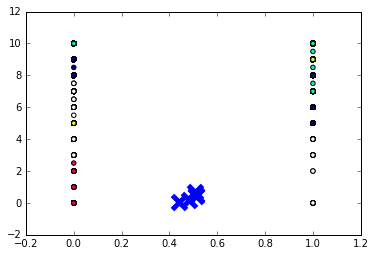

In [107]:
from sklearn.cluster import KMeans
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
%pylab inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from patsy import dmatrices
model = KMeans(n_clusters=5, random_state=1)
data_cluster=data_final[["attr","diff_attr","sinc","diff_sinc","intel","diff_intel","fun","diff_fun",\
                         "amb","diff_amb","samerace","field_same","region_same", "gender","dec"]]
data_f_no_na=data_cluster.fillna(0)
X=data_f_no_na.values
model.fit(X)
scatter(X[:,1], X[:,4], c=model.labels_, cmap='gist_ncar')
scatter(model.cluster_centers_[:,13], model.cluster_centers_[:,14], marker="x", s=200, linewidths=5)

## Decision Trees ##

In [162]:
y, X = dmatrices('dec ~ attr*diff_attr+sinc*diff_sinc+intel*diff_intel+fun*diff_fun+\
                 amb*diff_amb+samerace+field_same+region_same', data=data_m, return_type='dataframe')   

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn import tree ## Set up classifier
model = tree.DecisionTreeClassifier(criterion='entropy')
result = model.fit(X_train, y_train) ##fit the data

from sklearn import metrics

prediction_train = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train) ##

0.98172820708


In [163]:
prediction = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction) ## accuracy on test set

0.693605683837


This is far worse than the 92% accuracy we expected from the training set. Clearly, we are **overfitting**.

One way to avoid overfitting is to ensure that trees never become too deep, via the _max\_depth_ argument.

In [164]:
model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
result = model2.fit(X_train, y_train)

prediction_train = model2.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

0.732394366197


In [165]:
prediction = model2.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

0.745115452931


In [ ]:
from StringIO import StringIO
import pydotplus
from IPython.display import Image 
dot_data = StringIO()
tree.export_graphviz(model2, out_file=dot_data, feature_names=X.columns.values)
#pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('/Users/nikitalakhotia/Desktop/trial.png')

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png()) 